In [1]:
########################################
# Import Data
########################################
import pandas as pd
import os

#define file to import
file = 'data.csv'

#store name for future use
fname, _ = os.path.splitext(file)

#Import Data
df = pd.read_csv(file, sep=',', header=0)

#clean dataframes
df = df.rename(columns=lambda x: x.strip())
df = df.dropna()

#Show Dataframe
print(fname + ' dataset:')
df

data dataset:


,ID,GROUPE,MUSCLE,SWE_perc,SWE_raw,SWE_dist,ACTIVATION,LRELATIVE,LRELATIVE_pic,F_V,ForceRelative,ForceRelative_pic,ChargeInterne
0,1,NHE,SM,0.0,-0.1,0.00,0.341907,0.646984,0.996095,1.084533,0.263361,0.440011,0.256139
1,2,NHE,SM,6.0,2.0,0.18,0.602638,0.529459,0.841290,1.096524,0.355184,0.622870,0.368125
2,3,NHE,SM,0.0,-1.4,0.00,0.418067,0.683204,1.028167,1.089420,0.361932,0.722366,0.344897
3,4,NHE,SM,0.0,-7.6,0.00,0.397005,0.567855,0.935770,1.089609,0.277134,0.567802,0.270510
4,5,NHE,SM,0.0,-7.6,0.00,0.464852,0.718161,0.961237,1.064402,0.395749,0.636120,0.377784
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,17,DL,BF,31.1,9.9,0.60,0.116118,1.288176,1.508788,1.094721,0.305250,0.571073,0.162181
59,18,DL,BF,0.0,-2.5,0.00,0.596198,1.130732,1.372417,1.079483,0.631827,0.824287,0.751614
60,19,DL,BF,17.6,6.4,0.66,0.340944,1.209678,1.434567,1.077420,0.430590,0.533246,0.449137
61,20,DL,BF,25.7,8.9,0.43,0.340485,1.302315,1.515599,1.078430,0.512893,0.774861,0.486235


      VARIABLE       TRANS. METHOD    RESULT    STATISTICS
          SWE_perc         None    FAIL     stat=0.798, p=0.000
          SWE_perc    Shift+Log   REFAIL    stat.=0.792, p=0.000

          SWE_perc  yeo-johnson   REFAIL    stat.=0.877, p=0.000

           SWE_raw         None    FAIL     stat=0.958, p=0.031
           SWE_raw    Shift+Log   REFAIL    stat.=nan, p=nan

           SWE_raw  yeo-johnson     OK      stat.=0.985, p=0.636

          SWE_dist         None    FAIL     stat=0.869, p=0.000
          SWE_dist    Shift+Log   REFAIL    stat.=0.850, p=0.000

          SWE_dist  yeo-johnson   REFAIL    stat.=0.870, p=0.000

        ACTIVATION         None    FAIL     stat=0.959, p=0.033
        ACTIVATION          Log     OK      stat.=0.969, p=0.113

        ACTIVATION      box-cox     OK      stat.=0.981, p=0.421

         LRELATIVE         None    FAIL     stat=0.928, p=0.001
         LRELATIVE          Log   REFAIL    stat.=0.913, p=0.000

         LRELATIVE      box-cox

C:\Users\doguet-v-3\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


 ForceRelative_pic         None    FAIL     stat=0.930, p=0.002
 ForceRelative_pic          Log     OK      stat.=0.993, p=0.981

 ForceRelative_pic      box-cox     OK      stat.=0.993, p=0.982

     ChargeInterne         None    FAIL     stat=0.957, p=0.028
     ChargeInterne          Log     OK      stat.=0.979, p=0.345

     ChargeInterne      box-cox     OK      stat.=0.987, p=0.759



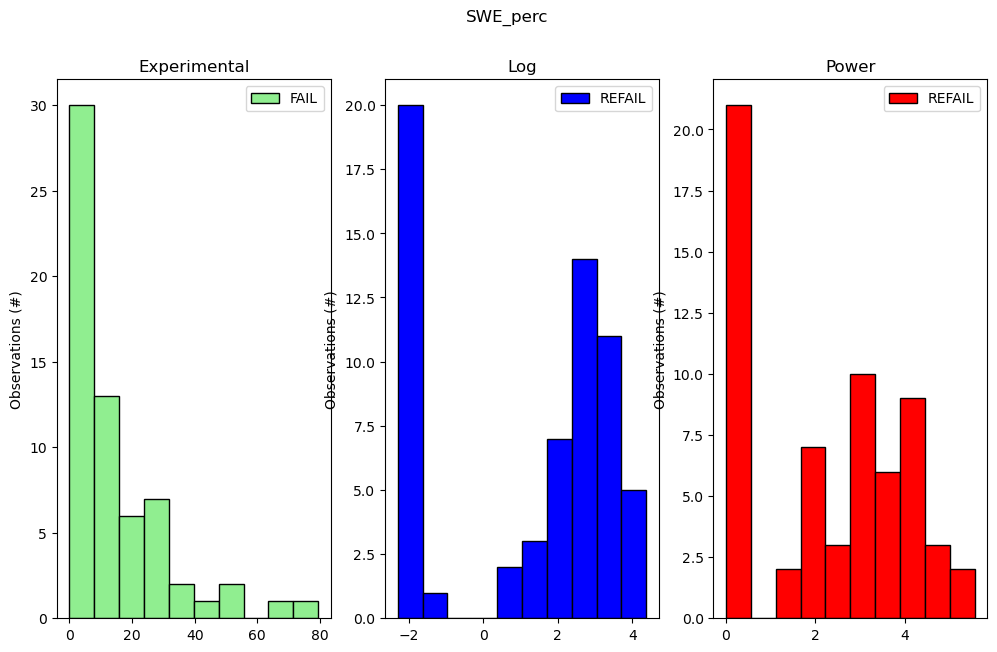

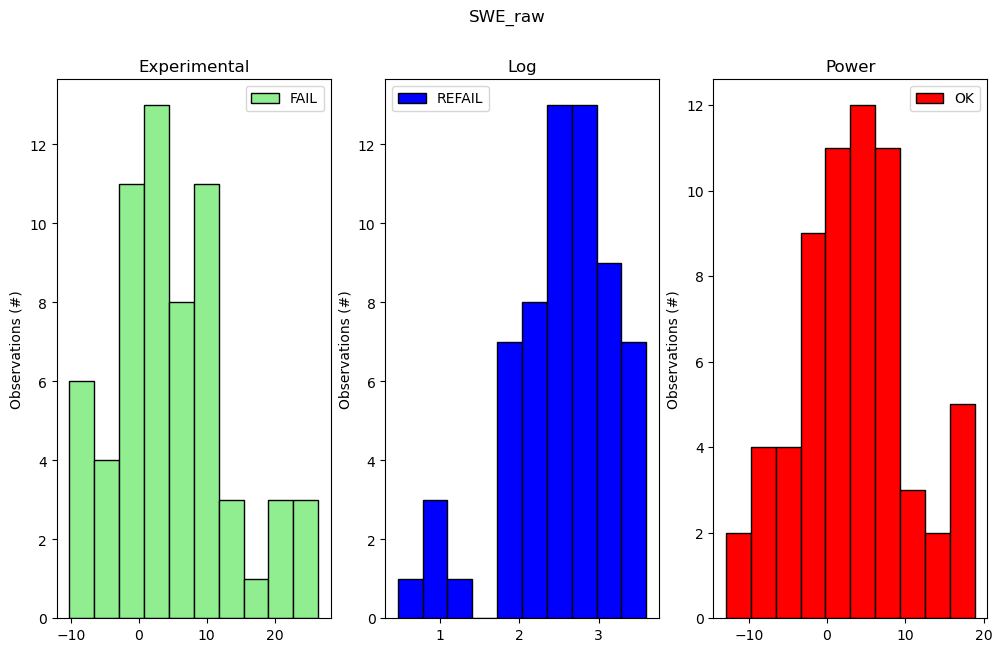

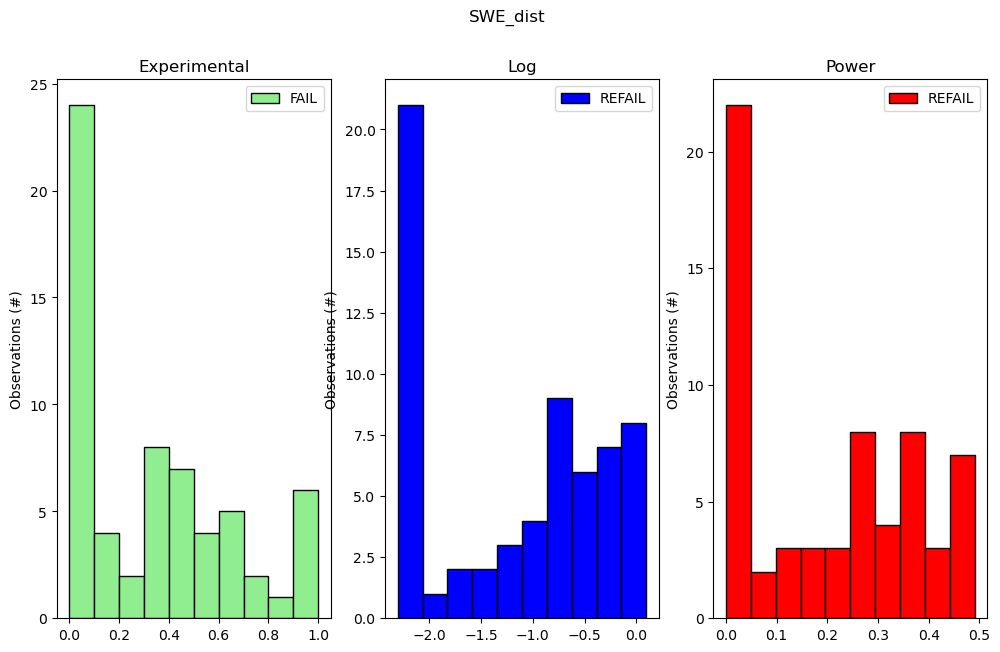

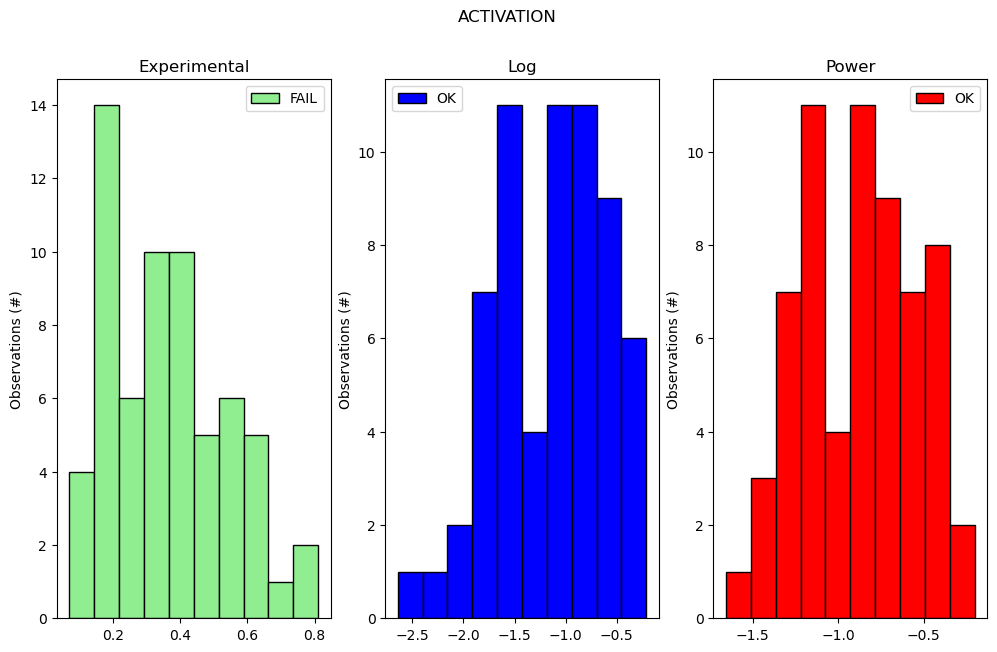

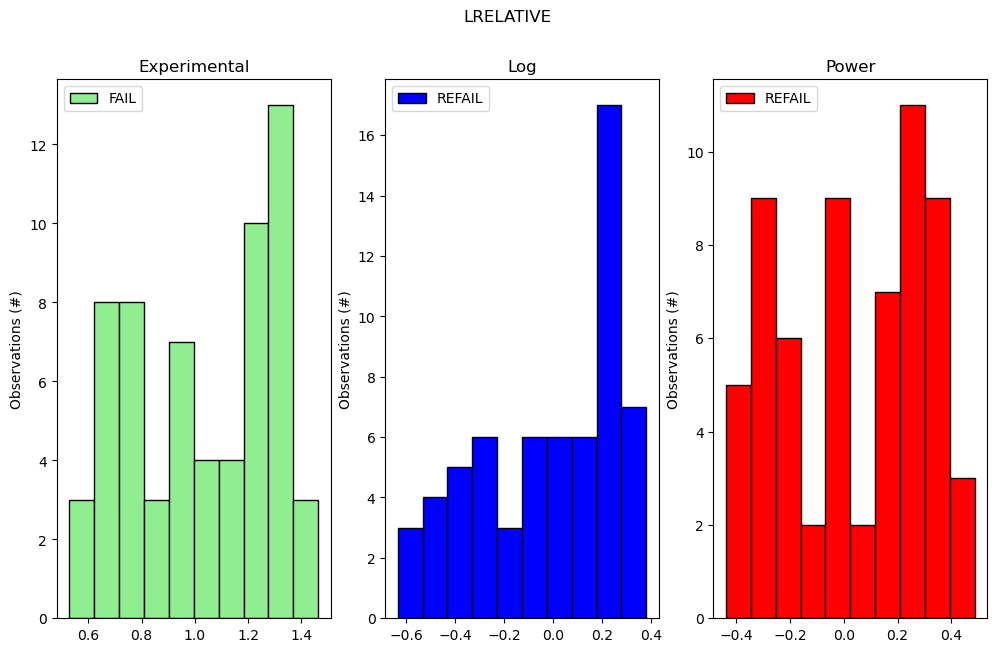

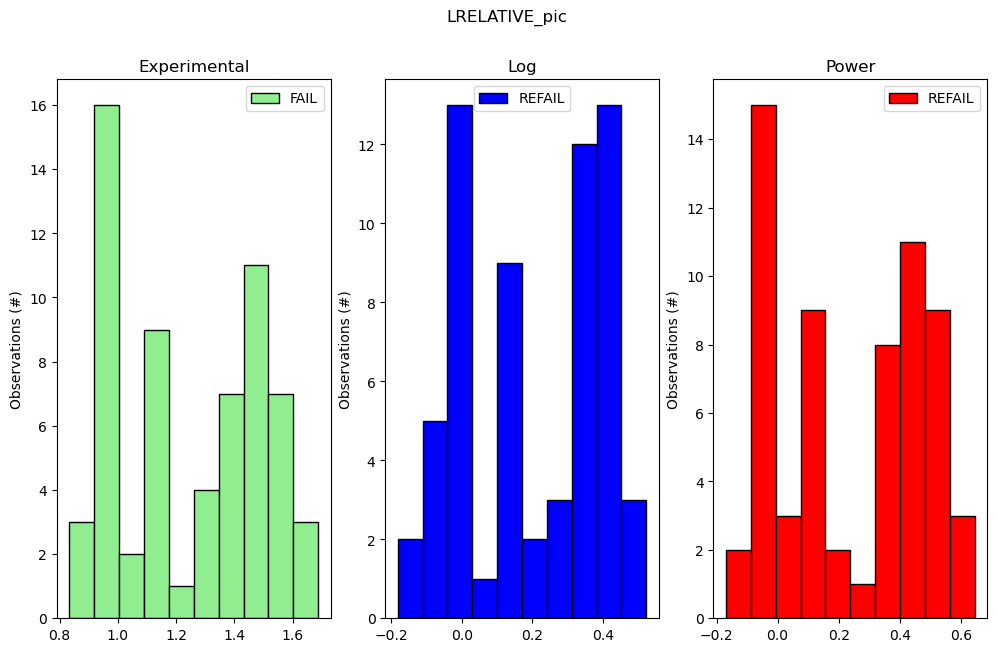

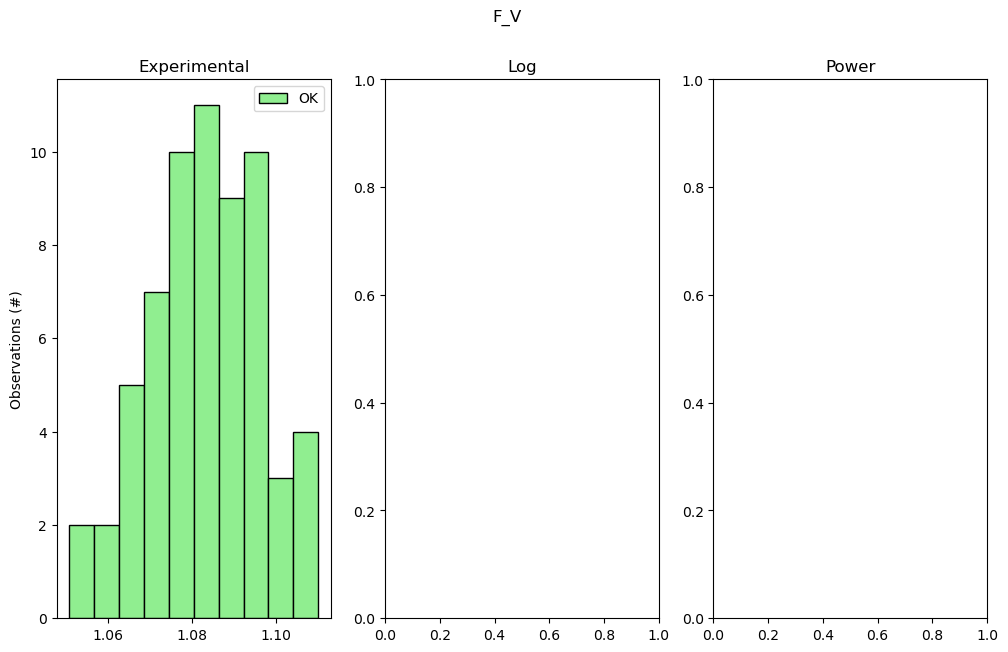

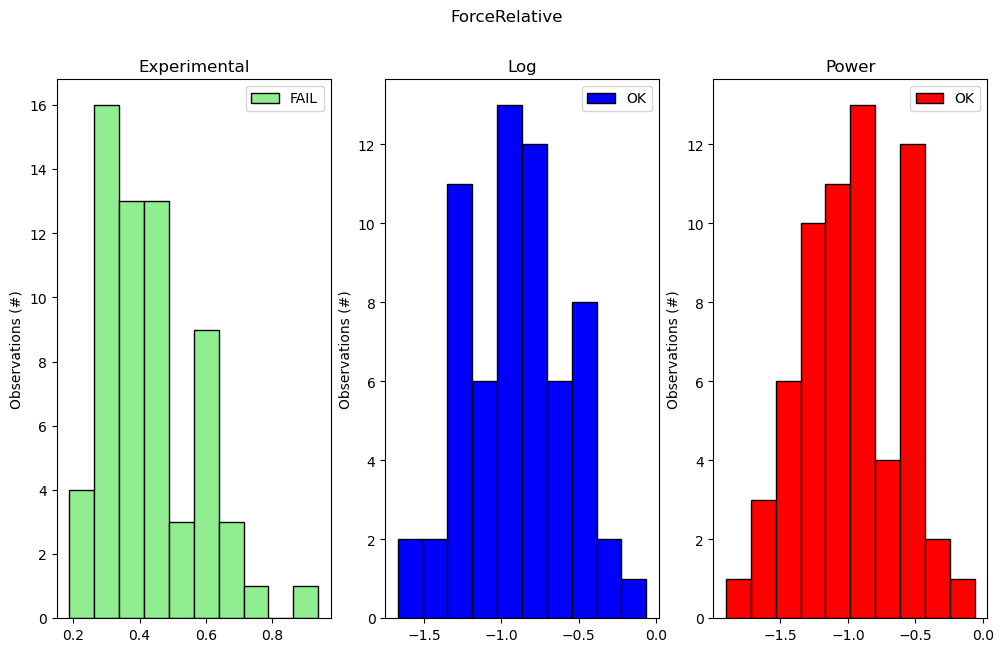

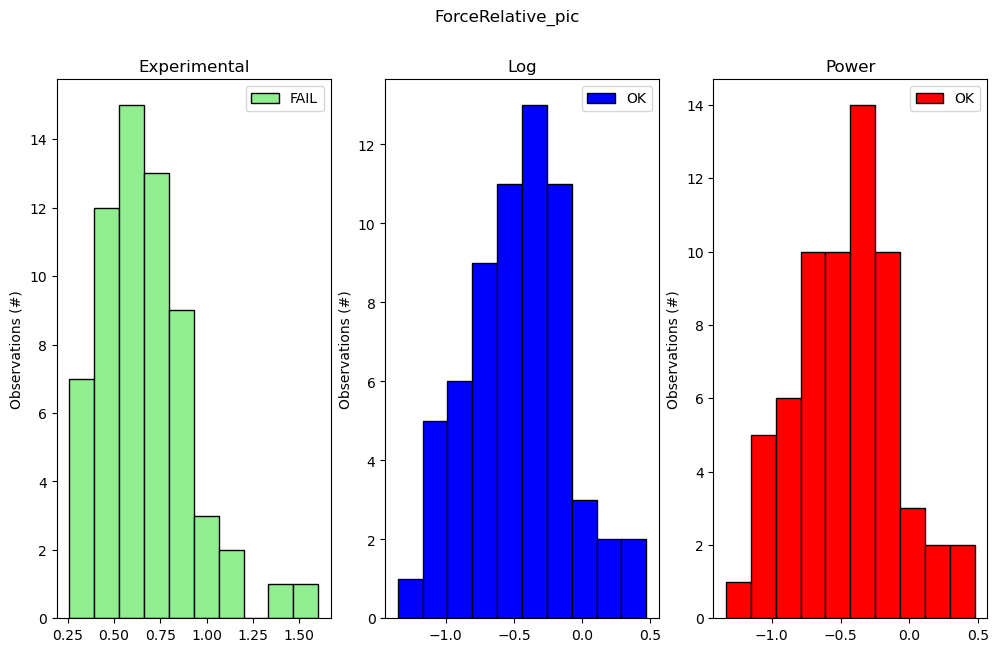

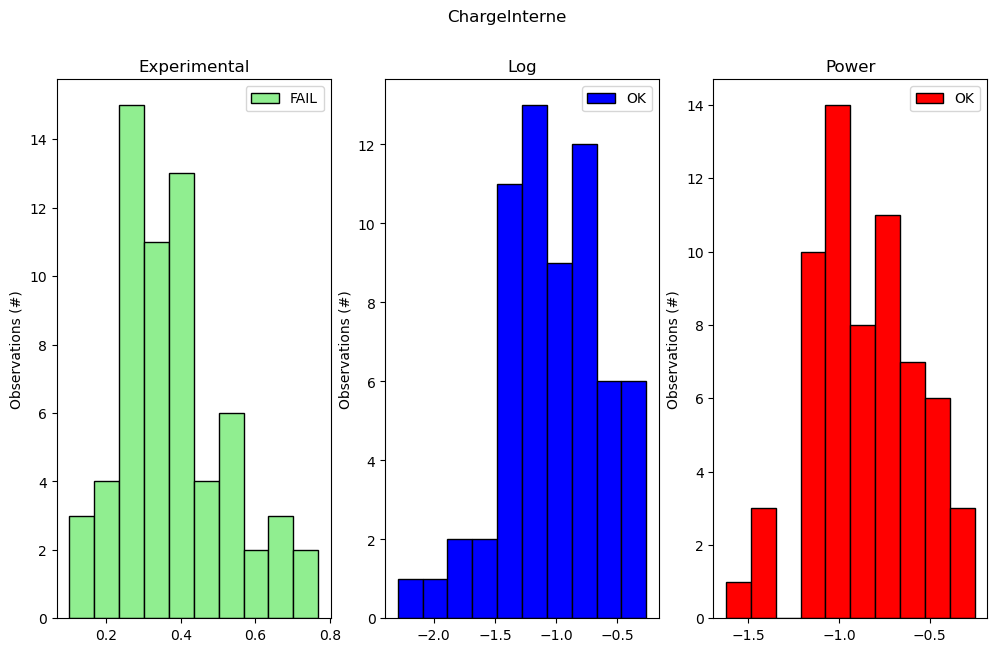

In [2]:
########################################
# Check Normality && Transform
########################################

from colorama import Fore, Back, Style
import numpy as np
import matplotlib .pyplot as plt
from scipy.stats import shapiro, pearsonr, linregress
from sklearn import preprocessing
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

"""
Shapiro-Wilk test (doc. [1]) is used to test normality for all variables separately,
for the whole dataset at once (62 rows, mixing groups and muscles).
/!\ This should be checked since each subject is represented on 3 different rows. /!\
[1] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

When normality test fails, data are transformed according to both log transform and power transform [2] and retesed.
[2] https://scikit-learn.org/stable/modules/preprocessing.html
"""

#Create independant copies of dataframes for data transforming purpose
dftrans = df.copy()
#create a list of column for which normality has to be tested
cols = df.drop(['ID', 'GROUPE', 'MUSCLE'], axis=1).columns.tolist()

#Print header for results
print(f'{"VARIABLE":^20} {"TRANS. METHOD":^12} {"RESULT":^12} STATISTICS')

#Enumerate all columns to test, perform Shapiro test and Plot data & transformed data if any.
for i, c in enumerate(cols):
    #prepare figure
    fig, axs = plt.subplots(1, 3)#use 3 columns to show experimental data, Log transformed and Power transformed data
    fig.suptitle(c)
    color = ['lightgreen', 'blue', 'red']
    #get the variable to test in initial dataframes
    y = df[c]
    #perform shapiro wilk test on whole exercise only
    stat, p = shapiro(y)
    #check result and process accordingly
    trans = 'None'
    if p > .05:
        norm = "OK"
        #show results
        print(f'{c:>18} {trans:>12}', end="")
        print(Back.GREEN + f'{norm:^12} stat={stat:.3f}, p={p:.3f}', end="")
        print(Style.RESET_ALL)
        line = f'{norm}'
        #define output variable identical to input
        yp = y
    else:
        norm = "FAIL"
        #show results
        print(f'{c:>18} {trans:>12}', end="")
        print(Back.RED + f'{norm:^12} stat={stat:.3f}, p={p:.3f}', end="")
        print(Style.RESET_ALL)
        line = f'{norm}'
        #then transform data using different ways
        k = 1;
        while True:
            if k > 2:
                break
            if k == 1:
                #make sure to handle only positive values since log of negative fails
                if np.any(y <= 0):
                    #if so, first shift all values to a constant value so that all data are >= 0 and log them
                    trans = 'Shift+Log'
                    yp = np.array(np.log(y + abs(np.min(y) + .1)))      #shifted log transform
                else:
                    trans = 'Log'
                    yp = np.array(np.log(y))      #only log transform
                #replace inf value (if any zero value)
                yp[np.where(np.isinf(yp))] = 0
            elif k == 2:
                try:
                    # Parametric Power Transform that only accept positive values
                    trans = 'box-cox'
                    pt = preprocessing.PowerTransformer(method=trans, standardize=False)
                    yp = pt.fit_transform(np.array(y).reshape(-1, 1))
                except:
                    # Parametric Power Transform
                    trans = 'yeo-johnson'
                    pt = preprocessing.PowerTransformer(method=trans, standardize=False)
                    yp = pt.fit_transform(np.array(y).reshape(-1, 1))
                #reshape
                yp = yp.reshape(1, -1)[0]
            #Retest normality with tranformed data
            stat, p = shapiro(yp)
            #show result
            print(f'{c:>18} {trans:>12}', end="")
            if p > 0.05:
                print(Fore.GREEN + f'{"OK":^12} stat.={stat:.3f}, p={p:.3f}')
            else:
                print(Fore.RED + f'{"REFAIL":^12} stat.={stat:.3f}, p={p:.3f}')
            print(Style.RESET_ALL)
            line2 = f'{"OK" if p > 0.05 else "REFAIL"}'
            #show modifyed data
            axs[k].hist(yp,
                        bins=10,
                        color=color[k],
                        ec='black',
                        label=line2)
            axs[k].set_ylabel('Observations (#)')
            axs[k].legend(facecolor='white')
            #increment
            k += 1
    #modify in transformad dataframes
    dftrans[c] = pd.Series(yp)
    #plot raw data
    axs[0].hist(y,
                bins=10,
                color=color[0],
                ec='black',
                label=line)
    axs[0].set_ylabel('Observations (#)')
    axs[0].legend(facecolor='white')
    axs[0].set_title('Experimental')
    axs[2].set_title('Power')
    axs[1].set_title('Log')


In [3]:
##############################
# For information > Normality by dividing dataset on both MUSCLE & GROUP
##############################

"""
In case it would be better to check data normality on categorized dat (divided by muscle & group),
then normality data are also performed on sub-datasets.
"""

lst_muscle = np.unique(df.MUSCLE)
lst_group = np.unique(df.GROUPE)
for c in cols:
    for g in lst_group:
        for m in lst_muscle:
            y = df[(df['MUSCLE'] == m) & (df['GROUPE'] == g)][c]
            #perform shapiro wilk test on whole exercise only
            stat, p = shapiro(y)
            #show results
            print(f'{c:>18}: {m}*{g}', end="")
            if p > 0.05:
                print(Fore.GREEN + f'{"OK":^8} stat.={stat:.3f}, p={p:.3f}, N={len(y)}')
            else:
                print(Fore.RED + f'{"FAIL":^8} stat.={stat:.3f}, p={p:.3f}, N={len(y)}')
            print(Style.RESET_ALL)

          SWE_perc: BF*DL   OK    stat.=0.889, p=0.134, N=11

          SWE_perc: SM*DL   OK    stat.=0.906, p=0.216, N=11

          SWE_perc: ST*DL  FAIL   stat.=0.572, p=0.000, N=11

          SWE_perc: BF*NHE   OK    stat.=0.866, p=0.090, N=10

          SWE_perc: SM*NHE  FAIL   stat.=0.623, p=0.000, N=10

          SWE_perc: ST*NHE   OK    stat.=0.883, p=0.140, N=10

           SWE_raw: BF*DL  FAIL   stat.=0.819, p=0.016, N=11

           SWE_raw: SM*DL   OK    stat.=0.907, p=0.225, N=11

           SWE_raw: ST*DL   OK    stat.=0.971, p=0.898, N=11

           SWE_raw: BF*NHE   OK    stat.=0.914, p=0.313, N=10

           SWE_raw: SM*NHE   OK    stat.=0.863, p=0.082, N=10

           SWE_raw: ST*NHE   OK    stat.=0.904, p=0.240, N=10

          SWE_dist: BF*DL   OK    stat.=0.870, p=0.077, N=11

          SWE_dist: SM*DL   OK    stat.=0.880, p=0.104, N=11

          SWE_dist: ST*DL  FAIL   stat.=0.580, p=0.000, N=11

          SWE_dist: BF*NHE   OK    stat.=0.909, p=0.276, N=10

 

In [4]:
"""
As a result, Experimental data for F-V was the only variable normally distributed at first.

For the remaining variables, power data transformation was used since this method showed better results than log transform.

For SWE variables, only SWE_raw (absolute diff between PRE & POST tests) passed the test and it was kept as dependent variable for regressions.
Neither SWE_perc (absolute changes PRE-POST) nore SWE_dist (distribution of SWE among hamstring) passed the test and were discarded.

/!\ Both LRELATIVE and LRELATIVE_pic failed the test. These are kept for now but performing linear regresion with these variables may introduce a bias. /!\
    Edit: for subdivided (by GROUP & MUSCLE) Shapiro test succeed for LRELATIVE, but not LRELATIVE_pic.
    Same for ForceRelative and ForceRelative_pic.
    It is then decided to discard 'pic' variables.

    Edit: since we try to find out how to calculate ChargeInterne with regression, this variable is also discard for now.
    
/!\ If we want to perform regression on experimental data, edit "base_df" definition from 'dftrans' to 'df', and alternatively
"""
out_df = df.drop(['SWE_perc', 'SWE_dist', 'LRELATIVE_pic', 'ForceRelative_pic', 'ChargeInterne'], axis=1)
#save data to perform stats on
out_df.to_csv(fname + '_regression_dataframe.csv', index=False)
#Finally show the final dataframe
print('Dataframe to work with after data transformation')
out_df


Dataframe to work with after data transformation


,ID,GROUPE,MUSCLE,SWE_raw,ACTIVATION,LRELATIVE,F_V,ForceRelative
0,1,NHE,SM,-0.1,0.341907,0.646984,1.084533,0.263361
1,2,NHE,SM,2.0,0.602638,0.529459,1.096524,0.355184
2,3,NHE,SM,-1.4,0.418067,0.683204,1.089420,0.361932
3,4,NHE,SM,-7.6,0.397005,0.567855,1.089609,0.277134
4,5,NHE,SM,-7.6,0.464852,0.718161,1.064402,0.395749
...,...,...,...,...,...,...,...,...
58,17,DL,BF,9.9,0.116118,1.288176,1.094721,0.305250
59,18,DL,BF,-2.5,0.596198,1.130732,1.079483,0.631827
60,19,DL,BF,6.4,0.340944,1.209678,1.077420,0.430590
61,20,DL,BF,8.9,0.340485,1.302315,1.078430,0.512893
